In [1]:
# Importing the data

# PS: Number of matches won by each team in IPL histroy

import os
import pandas as pd

path = r"D:/TERM 1/EDA/IPL Data"

os.chdir(path)

os.listdir(path)

ball = pd.read_excel("Ball_by_Ball.xlsx")

match = pd.read_excel("Match.xlsx")

player = pd.read_excel('Player.xlsx')

player_match = pd.read_excel('Player_Match.xlsx')

season = pd.read_excel('Season.xlsx')

team = pd.read_excel('Team.xlsx')

We spoke about the one way cross table and two way cross table.

NOTE: We can create two way cross table using groupby function and using pivot to transform the table

In [3]:
# Creating two way cross table using groupby function

Data = match.groupby(['Match_Winner_Id', 'Win_Type']).size().reset_index()

Data

# Tranforming the long data to wide data

(Data = Data.pivot('Match_Winner_Id', 'Win_Type',0)

Data



# Filling the missing values by 0

Data = Data.fillna(0)

# count the total

Data['Total'] = Data['Tie'] + Data['by runs'] + Data['by wickets']

Data


Win_Type,Tie,by runs,by wickets,Total
Match_Winner_Id,,,,
1.0,0.0,29.0,39.0,68.0
2.0,1.0,27.0,42.0,70.0
3.0,0.0,46.0,33.0,79.0
4.0,2.0,28.0,33.0,63.0
5.0,2.0,23.0,38.0,63.0
6.0,0.0,18.0,38.0,56.0
7.0,0.0,43.0,37.0,80.0
8.0,0.0,18.0,11.0,29.0
9.0,0.0,2.0,4.0,6.0


In [11]:
Data = Data.melt()
Data

,Win_Type,value
0,Tie,NaN
1,Tie,1.0
2,Tie,NaN
3,Tie,2.0
4,Tie,2.0
5,Tie,NaN
6,Tie,NaN
7,Tie,NaN
8,Tie,NaN
9,Tie,NaN


Higher Dimensional Tables:

The crosstab() function lets you create tables out of more than two categories. Higher dimensional tables can be a little confusing to look at, but they can also yield finer-grained insight into interactions between multiple variables.

In [64]:
# Lets create a cross table between type of win by each team in each season

data = pd.crosstab(index = [match['Match_Winner_Id'], match['Season_Id']], columns= match['Win_Type'], margins=True,margins_name='tot').reset_index()

data.head()

Win_Type,Match_Winner_Id,Season_Id,Tie,by runs,by wickets,tot
0,1,1,0,4,2,6
1,1,2,0,1,2,3
2,1,3,0,4,3,7
3,1,4,0,4,4,8
4,1,5,0,6,6,12


PS 1: Which team has highest average match aggregate?

PS 2: Create a table containing team name scoring maximum runs - season wise

In [28]:
# Solution of PS 2

TWSWR = ball.groupby(['Season_Id', 'Team_Batting_Id'])['Batsman_Scored'].sum().reset_index()

TWSWR['Rank'] = TWSWR.groupby(['Season_Id'])['Batsman_Scored'].rank(ascending=False)

# Now we can filter the data where ever its is ranked as 1


Result = TWSWR[(TWSWR.Rank == 1)]

Result





,Season_Id,Team_Batting_Id,Batsman_Scored,Rank
4,1,5,2420,1.0
15,2,8,2283,1.0
22,3,7,2661,1.0
26,4,3,2461,1.0
36,5,3,2716,1.0
49,6,7,2841,1.0
55,7,4,2824,1.0
66,8,7,2611,1.0
69,9,2,2859,1.0


Univariate Analysis: Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.Bar Charts. Histograms. Frequency Polygons. Pie Charts.

Univariate Descriptive Statistics : Some ways you can describe patterns found in univariate data include central tendency (mean, mode and median) and dispersion: range, variance, maximum, minimum, quartiles (including the interquartile range), and standard deviation.

Few visulazition methods used in Univariate Analysis :

1) Bar Charts. 2) Histograms. 3) Frequency Polygons. 4) Pie Charts.

Lets first understand the various data type:

1) Categorical Variable 2) Discrete Numerical varibale 3) Continuous Numerical variable 4) Date variable 5) Text variable 6) Geo variable

In [41]:
# Lets change the data type of column 

cols = [col for col in ball.columns if col not in ['Batsman_Scored', 'Extra_Runs']]

ball[cols] = ball[cols].apply(lambda x: x.astype('category'))

ball.dtypes

Match_Id                    category
Season_Id                   category
Innings_Id                  category
Over_Id                     category
Ball_Id                     category
Team_Batting_Id             category
Team_Bowling_Id             category
Striker_Id                  category
Striker_Batting_Position    category
Non_Striker_Id              category
Bowler_Id                   category
Batsman_Scored                 int64
Extra_Type                  category
Extra_Runs                    object
Player_dissimal_Id          category
Dissimal_Type               category
Fielder_Id                  category
dtype: object

Bar Chart - If we have to compare the different level of categorical variable

In [30]:
# Univariate Analysis - PS 1: Is team batting first scoring more runs or team chasing scoring more runs?

Runs_by_innings = ball.groupby('Innings_Id')['Batsman_Scored'].sum().reset_index().sort_values(by = 'Batsman_Scored')

Runs_by_innings

,Innings_Id,Batsman_Scored
3,4,70
2,3,80
1,2,78989
0,1,86811


In [38]:
# Actually Inning ID 3 and 4 refer to innings 1st or 2nd in super over match. This we can club them with 1 and 2 respt.

First_Inning_runs = Runs_by_innings[(Runs_by_innings['Innings_Id'] == 1) | (Runs_by_innings['Innings_Id'] == 3)]['Batsman_Scored'].sum()

First_Inning_runs

Second_Inning_runs = Runs_by_innings[(Runs_by_innings['Innings_Id'] == 2) | (Runs_by_innings['Innings_Id'] == 4)]['Batsman_Scored'].sum()

Second_Inning_runs

# lets create the list of two columns

#Final_Data = pd.DataFrame()

#Inning = ['First Inning', 'Second Inning']

#Runs = [First_Inning_runs, Second_Inning_runs]

#Final_Data['Inning'] = Inning

#Final_Data['Runs'] = Runs

#Final_Data

# OR

df = pd.DataFrame(list(zip(Inning, Runs)), columns=['Inning', 'Runs'])

df

,Inning,Runs
0,First Inning,86891
1,Second Inning,79059


In [40]:

First_Inning_runs = Runs_by_innings[(Runs_by_innings['Innings_Id'] == 1) | (Runs_by_innings['Innings_Id'] == 3)]['Batsman_Scored'].sum()

First_Inning_runs

Second_Inning_runs = Runs_by_innings[(Runs_by_innings['Innings_Id'] == 2) | (Runs_by_innings['Innings_Id'] == 4)]['Batsman_Scored'].sum()

Second_Inning_runs

df = pd.DataFrame(list(zip(Inning, Runs)), columns=['Inning', 'Runs'])

df

,Inning,Runs
0,First Inning,86891
1,Second Inning,79059


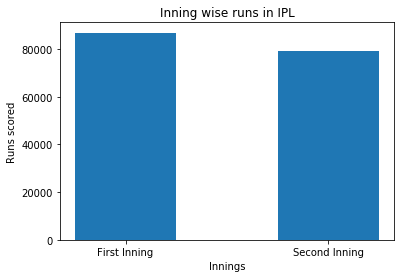

In [44]:
# Lets Plot this in form of a bar chart

from matplotlib import pyplot as plt

plt.bar(Final_Data['Inning'], Final_Data['Runs'], width= .5)

plt.xlabel('Innings')

plt.ylabel('Runs scored')

plt.title('Inning wise runs in IPL')

plt.show()

PS 2: Top 10 batsman based on Runs

PS 3: Top 10 Bowler based on extra runs

PS 4: Top 3 batsman based on centuries

PS 5: Are Right handed batsman dominating IPL?

In [51]:
# Solution to Top 3 batsman based on centuries
import numpy as np

Centuries_table = ball.groupby(['Match_Id', 'Striker_Id'])['Batsman_Scored'].sum().reset_index()

Centuries_table
# Creating the column of century

Centuries_table['Century'] = Centuries_table['Batsman_Scored'].apply(lambda x: 'Cent' if x > 99 else 'No')
Centuries_table
# You can also use numpy where function

Centuries_table['Century'] = np.where(Centuries_table['Batsman_Scored']>99, "Cent", "No")

Centuries_table

# Now lets filter the rows which contain Cent

Cent_table = Centuries_table[(Centuries_table['Century'] == "Cent")]

# Cross table on Striker ID to get the count of centuries for each player

Final_Table = pd.crosstab(index=Cent_table['Striker_Id'], columns='No. of Centuries').reset_index()

Final_Table.sort_values(by = 'No. of Centuries', ascending = False).head(3)

col_0,Striker_Id,No. of Centuries
19,162,5
1,8,4
16,110,3


In [63]:
list()

['Match_Id',
 'Match_Date',
 'Team_Name_Id',
 'Opponent_Team_Id',
 'Season_Id',
 'Venue_Name',
 'Toss_Winner_Id',
 'Toss_Decision',
 'IS_Superover',
 'IS_Result',
 'Is_DuckWorthLewis',
 'Win_Type',
 'Won_By',
 'Match_Winner_Id',
 'Man_Of_The_Match_Id',
 'First_Umpire_Id',
 'Second_Umpire_Id',
 'City_Name',
 'Host_Country']